<a href="https://colab.research.google.com/github/Gklimo/IHC-BERT/blob/main/marker_performances_hl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score, precision_score,recall_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pr_all_rep = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/IHC_BERT/Fine-tuning/pr_all_rep_bert_descr_hl.csv')
pr_all_rep_true = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/IHC_BERT/Fine-tuning/cHL_select_markers.xlsx')

In [ ]:
pr_all_rep=pr_all_rep.sort_values('specnum_formatted', ascending = True).reset_index().drop(['index'], axis=1)
pr_all_rep_true=pr_all_rep_true.sort_values('specnum_formatted', ascending = True).reset_index().drop(['index'], axis=1)

In [ ]:
pr_all_rep = pr_all_rep.rename(columns={'PAX':'PAX5'})

In [ ]:
pr_all_rep_true['PAX5'].unique()

array([ 1.,  3.,  0., nan])

In [ ]:
tru_cols = list(pr_all_rep_true.columns)
bert_cols = list(pr_all_rep.columns)

In [ ]:
del bert_cols[0]
del bert_cols[0]
del bert_cols[0]
del bert_cols[0]
del bert_cols[0]

In [ ]:
del tru_cols[0]
del tru_cols[0]
del tru_cols[0]
del tru_cols[0]
del tru_cols[0]
del tru_cols[0]
del tru_cols[0]

In [ ]:
tru_cols

['CD15', 'CD30', 'EBER', 'CD20', 'CD45', 'PAX5']

In [ ]:
pr_all_rep = pr_all_rep.replace({0:'NEGATIVE',1:'POSITIVE',3:'NONE'})
pr_all_rep_true = pr_all_rep_true.replace({0:'NEGATIVE',1:'POSITIVE',3:'NONE'})

In [ ]:
not_pax_45 = ['CD15', 'CD30', 'EBER', 'CD20']

In [ ]:
r = ['UH17-24401','UH17-6680','UH17-7900','UH17-9301']
for i in r:
  pr_all_rep=pr_all_rep[pr_all_rep['specnum_formatted']!=i]
  pr_all_rep_true = pr_all_rep_true[pr_all_rep_true['specnum_formatted']!=i]

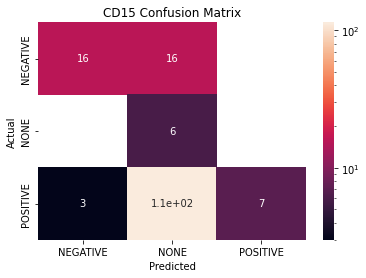

Performance metrics for CD15
Precision score: 0.63
Recall score: 0.52
f1 scre: 0.27



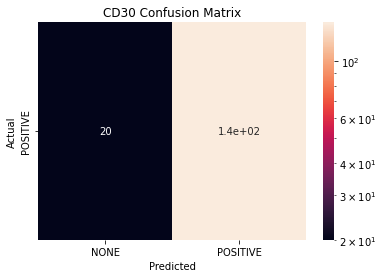

Performance metrics for CD30
Precision score: 0.33
Recall score: 0.29
f1 scre: 0.31



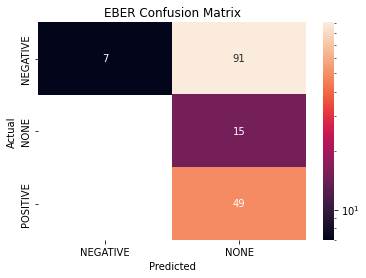

Performance metrics for EBER
Precision score: 0.37
Recall score: 0.36
f1 scre: 0.10



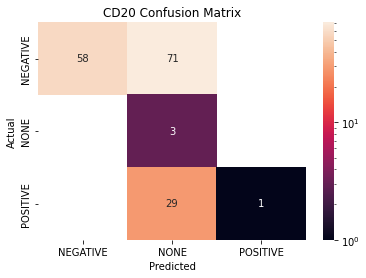

Performance metrics for CD20
Precision score: 0.68
Recall score: 0.49
f1 scre: 0.25



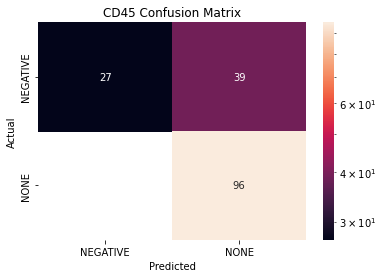

Performance metrics for CD45
Precision score: 0.57
Recall score: 0.47
f1 scre: 0.47



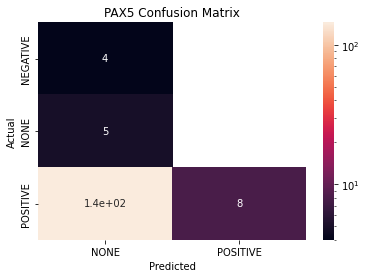

Performance metrics for PAX5
Precision score: 0.34
Recall score: 0.35
f1 scre: 0.05



In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score, precision_score,recall_score
results = pd.DataFrame(columns = ['Marker','Macro Precision','Macro Recall', 'Macro F1','Positive Precision','Positive Recall', 'Positive F1','Negative Precision','Negative Recall', 'Negative F1'])


for b in tru_cols:


    confusion_matrix = pd.crosstab(pr_all_rep_true[b], pr_all_rep[b],rownames=['Actual'], colnames=['Predicted'])
    #print (confusion_matrix)
    sn.heatmap(confusion_matrix, annot=True,norm=LogNorm())
    plt.title(str(b)+' Confusion Matrix')
    plt.show()

    print(f'Performance metrics for {b}')
    precision = precision_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['POSITIVE','NEGATIVE','NONE']) 
    precision1 = precision_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['NEGATIVE'])
    precision2 = precision_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['POSITIVE'])
    print('Precision score: {0:0.2f}'.format(precision))
    #print('Precision score: {0:0.2f}'.format(precision1))
    #print('Precision score: {0:0.2f}'.format(precision))

    recall = recall_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['POSITIVE','NEGATIVE','NONE'])
    recall1 = recall_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['NEGATIVE'])
    recall2 = recall_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['POSITIVE'])
    print('Recall score: {0:0.2f}'.format(recall))

    f1 = f1_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['POSITIVE','NEGATIVE','NONE'])
    f11 = f1_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['NEGATIVE'])
    f12 = f1_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['POSITIVE'])
    print('f1 scre: {0:0.2f}\n'.format(f1))
    df = pd.DataFrame({'Marker': [b],'Macro Precision' : [precision],'Macro Recall':[recall], 'Macro F1': [f1],\
                       'Positive Precision' : [precision2],'Positive Recall':[recall2], 'Positive F1': [f12],\
                       'Negative Precision' : [precision1],'Negative Recall':[recall1], 'Negative F1': [f11]})
    results = results.append(df)


In [ ]:
results

,Marker,Macro Precision,Macro Recall,Macro F1,Positive Precision,Positive Recall,Positive F1,Negative Precision,Negative Recall,Negative F1
0,CD15,0.628741,0.518817,0.272943,1.0,0.056452,0.106870,0.842105,0.500000,0.627451
0,CD30,0.333333,0.292181,0.311404,1.0,0.876543,0.934211,0.000000,0.000000,0.000000
0,EBER,0.365591,0.357143,0.103268,0.0,0.000000,0.000000,1.000000,0.071429,0.133333
0,CD20,0.676375,0.494315,0.247147,1.0,0.033333,0.064516,1.000000,0.449612,0.620321
0,CD45,0.570370,0.469697,0.470605,0.0,0.000000,0.000000,1.000000,0.409091,0.580645
0,PAX5,0.344156,0.350763,0.054091,1.0,0.052288,0.099379,0.000000,0.000000,0.000000


In [ ]:
#save performance by marker results
results.sort_values('Macro F1', ascending = False).head(50)
results.to_csv('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/IHC_BERT/Fine-tuning/marker_res_hl.csv')

In [ ]:
all_counts = pd.DataFrame(columns = ['Status','Count'])
for col in tru_cols:
  
  df = pd.DataFrame(pr_all_rep_true[col].value_counts(normalize = True).reset_index().values, columns = ['Status','Proportion|'])
  df['Marker'] = col
  print(df)
  all_counts = all_counts.append(df[df['Status']=='POSITIVE']).reset_index(drop=True)
  


     Status Proportion| Marker
0  POSITIVE    0.765432   CD15
1  NEGATIVE    0.197531   CD15
2      NONE    0.037037   CD15
     Status Proportion| Marker
0  POSITIVE         1.0   CD30
     Status Proportion| Marker
0  NEGATIVE    0.604938   EBER
1  POSITIVE    0.302469   EBER
2      NONE    0.092593   EBER
     Status Proportion| Marker
0  NEGATIVE    0.796296   CD20
1  POSITIVE    0.185185   CD20
2      NONE    0.018519   CD20
     Status Proportion| Marker
0      NONE    0.592593   CD45
1  NEGATIVE    0.407407   CD45
     Status Proportion| Marker
0  POSITIVE    0.944444   PAX5
1      NONE    0.030864   PAX5
2  NEGATIVE    0.024691   PAX5


In [ ]:
all_counts_b = pd.DataFrame(columns = ['Status','Proportion'])
for col in tru_cols:
  
  df = pd.DataFrame(pr_all_rep[col].value_counts(normalize = True).reset_index().values, columns = ['Status','Proportion'])
  df['Marker'] = col

  all_counts_b = all_counts_b.append(df[df['Status']=='POSITIVE']).reset_index(drop=True)
all_counts_b  


,Status,Proportion,Marker
0,POSITIVE,0.04321,CD15
1,POSITIVE,0.876543,CD30
2,POSITIVE,0.006173,CD20
3,POSITIVE,0.049383,PAX5


In [ ]:
all_counts_b = pd.DataFrame(columns = ['Status','Proportion'])
for col in tru_cols:
  
  df = pd.DataFrame(pr_all_rep[col].value_counts(normalize = True).reset_index().values, columns = ['Status','Proportion'])
  df['Marker'] = col

  all_counts_b = all_counts_b.append(df[df['Status']=='NEGATIVE']).reset_index(drop=True)
all_counts_b  


,Status,Proportion,Marker
0,NEGATIVE,0.117284,CD15
1,NEGATIVE,0.04321,EBER
2,NEGATIVE,0.358025,CD20
3,NEGATIVE,0.166667,CD45


In [ ]:
all_counts = pd.DataFrame(columns = ['Status','Proportion'])
for col in tru_cols:
  
  df = pd.DataFrame(pr_all_rep_true[col].value_counts(normalize = True).reset_index().values, columns = ['Status','Proportion'])
  df['Marker'] = col

  all_counts = all_counts.append(df[df['Status']=='POSITIVE']).reset_index(drop=True)
all_counts  

,Status,Proportion,Marker
0,POSITIVE,0.765432,CD15
1,POSITIVE,1.0,CD30
2,POSITIVE,0.302469,EBER
3,POSITIVE,0.185185,CD20
4,POSITIVE,0.944444,PAX5


In [ ]:
all_counts = pd.DataFrame(columns = ['Status','Proportion'])
for col in tru_cols:
  
  df = pd.DataFrame(pr_all_rep_true[col].value_counts(normalize = True).reset_index().values, columns = ['Status','Proportion'])
  df['Marker'] = col

  all_counts = all_counts.append(df[df['Status']=='NEGATIVE']).reset_index(drop=True)
all_counts  

,Status,Proportion,Marker
0,NEGATIVE,0.197531,CD15
1,NEGATIVE,0.604938,EBER
2,NEGATIVE,0.796296,CD20
3,NEGATIVE,0.407407,CD45
4,NEGATIVE,0.024691,PAX5
